In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os
import zipfile

# Define paths for the dataset
dataset_path = "/content/drive/MyDrive/FLARE22Train.zip"
extracted_path = "/content/FLARE22Train"  # Path where the dataset will be extracted

# Extract the dataset if not already extracted
if not os.path.exists(extracted_path):
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)

# Check the extracted directory structure
for root, dirs, files in os.walk(extracted_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("")

# Assuming paths to images and labels (update these based on the inspection)
images_path = os.path.join(extracted_path, "images")  # Adjust this path based on the output
labels_path = os.path.join(extracted_path, "labels")  # Adjust this path based on the output

# After confirming the paths, you can proceed to load the images and labels as before.

Root: /content/FLARE22Train
Directories: ['FLARE22Train']
Files: []

Root: /content/FLARE22Train/FLARE22Train
Directories: ['images', 'labels']
Files: []

Root: /content/FLARE22Train/FLARE22Train/images
Directories: []
Files: ['FLARE22_Tr_0007_0000.nii.gz', 'FLARE22_Tr_0035_0000.nii.gz', 'FLARE22_Tr_0043_0000.nii.gz', 'FLARE22_Tr_0046_0000.nii.gz', 'FLARE22_Tr_0042_0000.nii.gz', 'FLARE22_Tr_0044_0000.nii.gz', 'FLARE22_Tr_0009_0000.nii.gz', 'FLARE22_Tr_0020_0000.nii.gz', 'FLARE22_Tr_0001_0000.nii.gz', 'FLARE22_Tr_0017_0000.nii.gz', 'FLARE22_Tr_0033_0000.nii.gz', 'FLARE22_Tr_0031_0000.nii.gz', 'FLARE22_Tr_0014_0000.nii.gz', 'FLARE22_Tr_0029_0000.nii.gz', 'FLARE22_Tr_0010_0000.nii.gz', 'FLARE22_Tr_0002_0000.nii.gz', 'FLARE22_Tr_0021_0000.nii.gz', 'FLARE22_Tr_0016_0000.nii.gz', 'FLARE22_Tr_0006_0000.nii.gz', 'FLARE22_Tr_0004_0000.nii.gz', 'FLARE22_Tr_0025_0000.nii.gz', 'FLARE22_Tr_0026_0000.nii.gz', 'FLARE22_Tr_0018_0000.nii.gz', 'FLARE22_Tr_0013_0000.nii.gz', 'FLARE22_Tr_0050_0000.nii.gz'

Found 50 image files and 50 label files.
Training on 40 scans, validating on 10 scans.
Starting training...
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 315s 7s/step - accuracy: 0.7307 - dice_coefficient: 0.7015 - loss: 7.4247 - val_accuracy: 0.9525 - val_dice_coefficient: 0.9336 - val_loss: 0.1355
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 306s 7s/step - accuracy: 0.9489 - dice_coefficient: 0.9298 - loss: 0.1463 - val_accuracy: 0.9528 - val_dice_coefficient: 0.9361 - val_loss: 0.1149
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 327s 8s/step - accuracy: 0.9532 - dice_coefficient: 0.9364 - loss: 0.1199 - val_accuracy: 0.9675 - val_dice_coefficient: 0.9502 - val_loss: 0.0945
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 307s 7s/step - accuracy: 0.9676 - dice_coefficient: 0.9501 - loss: 0.0940 - val_accuracy: 0.9719 - val_dice_coefficient: 0.9583 - val_loss: 0.0764
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 316s 7s/step - accuracy: 0.9719 - dice_coefficient: 0.9592 - loss: 0.0759 - val_accuracy: 0.9734 - val_dice_coeffi

Training complete.
Model saved to /content/drive/MyDrive/3D_Segmentation_Model.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step
Liver: Dice Coefficient = 0.5890
Right Kidney: Dice Coefficient = 0.3875
Left Kidney: Dice Coefficient = 0.3210
Spleen: Dice Coefficient = 0.0000


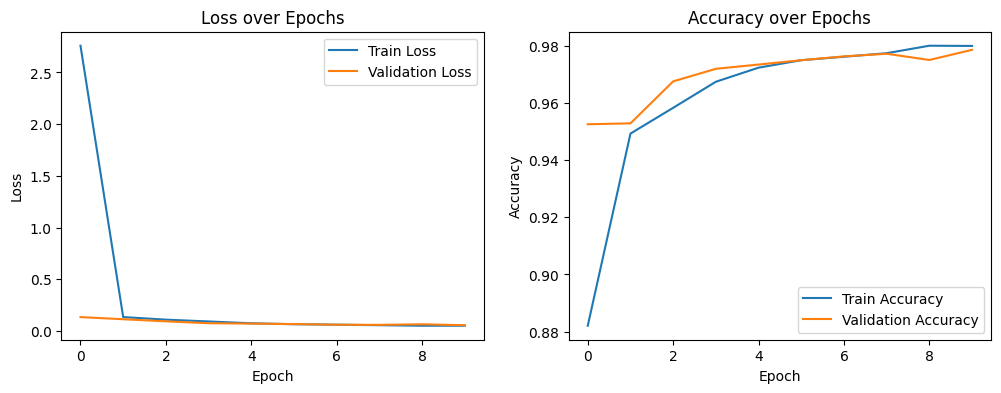

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


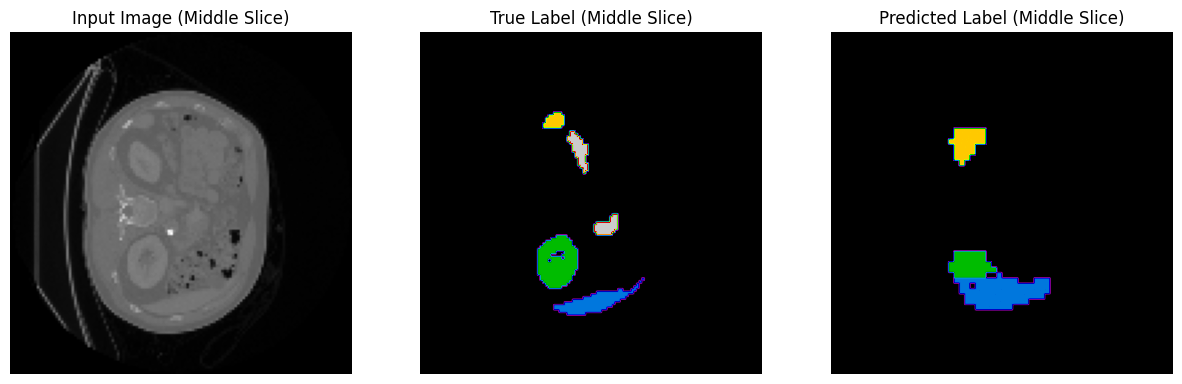

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


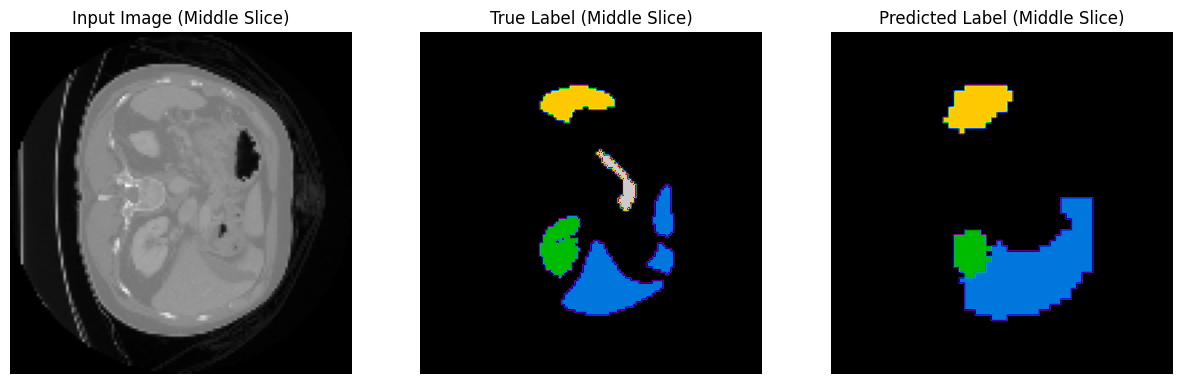

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


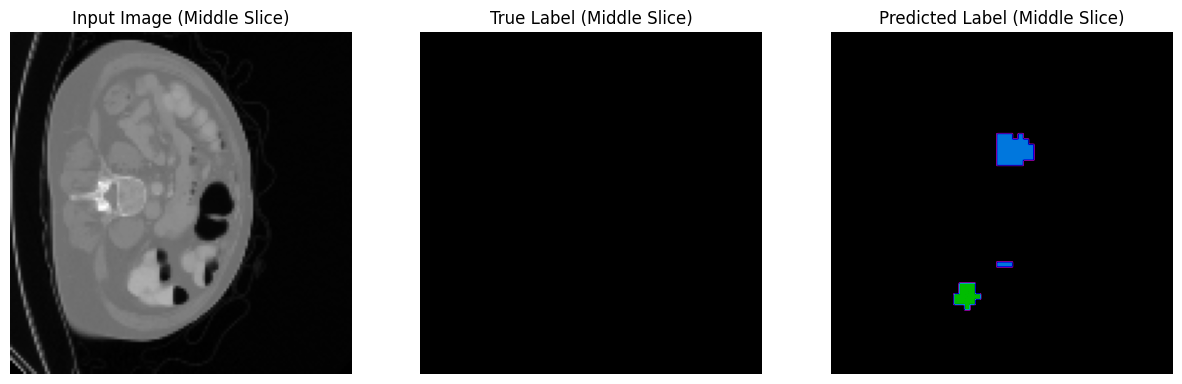

In [ ]:
import os
import zipfile
import nibabel as nib
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# Define paths for the dataset
dataset_zip_path = "/content/drive/MyDrive/FLARE22Train.zip"
extracted_path = "/content/FLARE22Train/FLARE22Train"

# Extract the dataset if not already extracted
if not os.path.exists(extracted_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)
    print("Extraction complete.")

# Assuming paths to images and labels (update these based on the extracted directory structure)
images_path = os.path.join(extracted_path, "images")
labels_path = os.path.join(extracted_path, "labels")

# List all image and label files
image_files = sorted([os.path.join(images_path, f) for f in os.listdir(images_path) if f.endswith('.nii.gz')])
label_files = sorted([os.path.join(labels_path, f) for f in os.listdir(labels_path) if f.endswith('.nii.gz')])

print(f"Found {len(image_files)} image files and {len(label_files)} label files.")

# Define the target organ classes (assuming 1: Liver, 2: Right Kidney, 3: Left Kidney, 4: Spleen)
target_classes = [1, 2, 3, 4]

# Define a data generator to load and preprocess data on-the-fly
class DataGenerator(Sequence):
    def __init__(self, image_files, label_files, batch_size=1, dim=(128, 128, 64), n_channels=1, n_classes=5, shuffle=True):
        self.image_files = image_files
        self.label_files = label_files
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_files))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.image_files) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        image_files_temp = [self.image_files[k] for k in indexes]
        label_files_temp = [self.label_files[k] for k in indexes]

        X, y = self.__data_generation(image_files_temp, label_files_temp)

        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, image_files_temp, label_files_temp):
        X = np.empty((self.batch_size, *self.dim, self.n_channels), dtype=np.float32)
        y = np.empty((self.batch_size, *self.dim), dtype=np.uint8)  # Changed to uint8 for memory efficiency

        for i, (img_file, lbl_file) in enumerate(zip(image_files_temp, label_files_temp)):
            img = nib.load(img_file).get_fdata()
            lbl = nib.load(lbl_file).get_fdata()

            # Resize images and labels to the target dimensions
            img_resized = zoom(img, (self.dim[0] / img.shape[0], self.dim[1] / img.shape[1], self.dim[2] / img.shape[2]), order=1)
            lbl_resized = zoom(lbl, (self.dim[0] / lbl.shape[0], self.dim[1] / lbl.shape[1], self.dim[2] / lbl.shape[2]), order=0)

            # Filter the labels to focus only on the target organs
            lbl_filtered = np.zeros_like(lbl_resized, dtype=np.uint8)
            for j, target_class in enumerate(target_classes, start=1):
                lbl_filtered[lbl_resized == target_class] = j

            X[i,] = np.expand_dims(img_resized, axis=-1)  # Add channel dimension
            y[i,] = lbl_filtered

        y = tf.keras.utils.to_categorical(y, num_classes=self.n_classes)

        return X, y


# Split the dataset into training and validation sets
train_img_files, val_img_files, train_lbl_files, val_lbl_files = train_test_split(image_files, label_files, test_size=0.2, random_state=42)
print(f"Training on {len(train_img_files)} scans, validating on {len(val_img_files)} scans.")

# Create data generators for training and validation
batch_size = 1
train_generator = DataGenerator(train_img_files, train_lbl_files, batch_size=batch_size)
val_generator = DataGenerator(val_img_files, val_lbl_files, batch_size=batch_size)

# Define Dice Coefficient metric
def dice_coefficient(y_true, y_pred):
    y_true_f = tf.keras.backend.flatten(tf.cast(y_true, dtype=tf.float32))
    y_pred_f = tf.keras.backend.flatten(tf.cast(y_pred, dtype=tf.float32))
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + 1)

# Define the VNet model architecture
def get_vnet(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv3D(16, 3, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling3D(pool_size=(2, 2, 2))(x)

    x = layers.Conv3D(32, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling3D(pool_size=(2, 2, 2))(x)

    x = layers.Conv3D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling3D(pool_size=(2, 2, 2))(x)

    x = layers.Conv3D(128, 3, activation='relu', padding='same')(x)

    x = layers.Conv3DTranspose(64, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling3D(size=(2, 2, 2))(x)

    x = layers.Conv3DTranspose(32, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling3D(size=(2, 2, 2))(x)

    x = layers.Conv3DTranspose(16, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling3D(size=(2, 2, 2))(x)

    outputs = layers.Conv3D(5, 1, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    return model

# Create the model
input_shape = (128, 128, 64, 1)
model = get_vnet(input_shape)

# Compile the model with the Dice coefficient as a metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', dice_coefficient])

# Train the model with a reduced number of epochs
print("Starting training...")
history = model.fit(train_generator, epochs=10, validation_data=val_generator)
print("Training complete.")

# Save the model
model_save_path = "/content/drive/MyDrive/3D_Segmentation_Model.h5"
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Generate predictions for the validation set
val_predictions = model.predict(val_generator)

# Concatenate predictions and ground truth from batches
val_pred = np.concatenate([np.argmax(pred, axis=-1) for pred in val_predictions], axis=0)
val_true = np.concatenate([np.argmax(batch[1], axis=-1) for batch in val_generator], axis=0)

# Compute Dice Coefficient for each organ separately
def dice_coefficient_per_class(y_true, y_pred, n_classes=5):
    dice_scores = []
    for i in range(1, n_classes):  # Skipping background class 0
        y_true_f = tf.keras.backend.flatten(tf.cast(y_true == i, dtype=tf.float32))
        y_pred_f = tf.keras.backend.flatten(tf.cast(y_pred == i, dtype=tf.float32))
        intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
        dice = (2. * intersection + 1) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + 1)
        dice_scores.append(dice)
    return dice_scores

# Compute and print dice scores for each organ
dice_scores = dice_coefficient_per_class(val_true, val_pred)
organ_names = ["Liver", "Right Kidney", "Left Kidney", "Spleen"]
for organ, dice in zip(organ_names, dice_scores):
    print(f"{organ}: Dice Coefficient = {dice:.4f}")


# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Visualize predictions for a few samples
def visualize_predictions(generator, model, num_samples=3):
    for i in range(num_samples):
        X, y_true = generator[i]
        y_pred = model.predict(X)

        # Convert predictions and true labels to class indices
        y_true = np.argmax(y_true, axis=-1)
        y_pred = np.argmax(y_pred, axis=-1)

        # Plot the results for each sample in the batch
        for j in range(X.shape[0]):  # X.shape[0] is the batch size
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))

            # Plot the input image (middle slice)
            middle_slice = X[j, :, :, X.shape[3] // 2, 0]  # middle slice in the z-dimension
            axes[0].imshow(middle_slice, cmap='gray')
            axes[0].set_title('Input Image (Middle Slice)')
            axes[0].axis('off')

            # Plot the true label (middle slice)
            axes[1].imshow(y_true[j, :, :, X.shape[3] // 2], cmap='nipy_spectral', vmin=0, vmax=4)
            axes[1].set_title('True Label (Middle Slice)')
            axes[1].axis('off')

            # Plot the predicted label (middle slice)
            axes[2].imshow(y_pred[j, :, :, X.shape[3] // 2], cmap='nipy_spectral', vmin=0, vmax=4)
            axes[2].set_title('Predicted Label (Middle Slice)')
            axes[2].axis('off')

            plt.show()

# Visualize some predictions from the validation set
visualize_predictions(val_generator, model, num_samples=3)
